✅ 이미지 파일명 컬럼으로 'ID' 사용


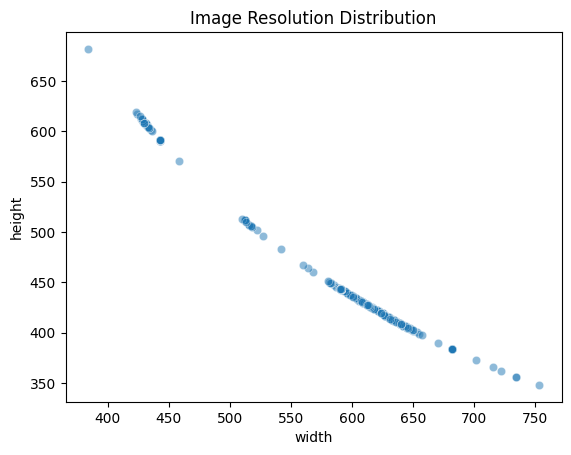

In [2]:
import os
import pandas as pd
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt

img_dir = '/root/cv_project/data/train/'
train = pd.read_csv('/root/cv_project/data/train.csv')

# id 관련 컬럼명 자동 탐색
id_col_candidates = [c for c in train.columns if 'id' in c.lower() or 'file' in c.lower() or 'path' in c.lower()]
if not id_col_candidates:
    raise KeyError(f"'id' 또는 'file' 관련 컬럼을 찾을 수 없습니다. 현재 컬럼: {list(train.columns)}")
id_col = id_col_candidates[0]

print(f"✅ 이미지 파일명 컬럼으로 '{id_col}' 사용")

# 이미지 크기 추출
widths, heights = [], []
for img_name in train[id_col]:
    # 확장자 자동 판별
    if not img_name.lower().endswith(('.jpg', '.png', '.jpeg')):
        img_name = f"{img_name}.jpg"
    img_path = os.path.join(img_dir, img_name)
    if os.path.exists(img_path):
        with Image.open(img_path) as im:
            w, h = im.size
            widths.append(w)
            heights.append(h)

meta_img = pd.DataFrame({'width': widths, 'height': heights})

# 시각화
sns.scatterplot(x='width', y='height', data=meta_img, alpha=0.5)
plt.title('Image Resolution Distribution')
plt.show()
